<a href="https://colab.research.google.com/github/jkasprowicz/stresslevel/blob/main/handsonworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

# Load and parse the XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Initialize lists to store heart rate and workout data
heart_rate_data = []
workout_data = []

# Loop through the XML records
for record in root.findall('Record'):
    record_type = record.get('type')
    timestamp = record.get('startDate')
    value = record.get('value')

    # Extract heart rate records
    if record_type == "HKQuantityTypeIdentifierHeartRate":
        heart_rate_data.append((timestamp, float(value)))

    # Extract workout records (to detect exercise periods)
    elif record_type == "HKWorkoutTypeIdentifier":
        workout_data.append((timestamp, record.get('workoutActivityType')))

# Convert data to pandas DataFrames
heart_rate_df = pd.DataFrame(heart_rate_data, columns=['timestamp', 'heart_rate'])
workout_df = pd.DataFrame(workout_data, columns=['timestamp', 'activity_type'])

print(heart_rate_df.head())
print(workout_df.head())

                   timestamp  heart_rate
0  2023-09-23 13:41:01 -0300        84.0
1  2023-09-23 13:49:04 -0300        79.0
2  2023-09-23 13:51:57 -0300        84.0
3  2023-09-23 13:56:12 -0300        80.0
4  2023-09-23 14:02:05 -0300        83.0
Empty DataFrame
Columns: [timestamp, activity_type]
Index: []


In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract records of interest
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')
    source = record.get('sourceName')

    # Keep only relevant records
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKWorkoutActivityType",
        "HKCategoryTypeIdentifierSleepAnalysis"
    ]:
        data.append([record_type, value, start_date, end_date, source])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date', 'end_date', 'source'])

# Convert date columns to datetime and value to numeric
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

print(df.head())

                                type  value                start_date  \
0  HKQuantityTypeIdentifierHeartRate   84.0 2023-09-23 13:41:01-03:00   
1  HKQuantityTypeIdentifierHeartRate   79.0 2023-09-23 13:49:04-03:00   
2  HKQuantityTypeIdentifierHeartRate   84.0 2023-09-23 13:51:57-03:00   
3  HKQuantityTypeIdentifierHeartRate   80.0 2023-09-23 13:56:12-03:00   
4  HKQuantityTypeIdentifierHeartRate   83.0 2023-09-23 14:02:05-03:00   

                   end_date              source  
0 2023-09-23 13:41:01-03:00  João’s Apple Watch  
1 2023-09-23 13:49:04-03:00  João’s Apple Watch  
2 2023-09-23 13:51:57-03:00  João’s Apple Watch  
3 2023-09-23 13:56:12-03:00  João’s Apple Watch  
4 2023-09-23 14:02:05-03:00  João’s Apple Watch  


Number of rows: 94445
Number of columns: 5

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94445 entries, 0 to 94444
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype                    
---  ------      --------------  -----                    
 0   type        94445 non-null  object                   
 1   value       91443 non-null  float64                  
 2   start_date  94445 non-null  datetime64[ns, UTC-03:00]
 3   end_date    94445 non-null  datetime64[ns, UTC-03:00]
 4   source      94445 non-null  object                   
dtypes: datetime64[ns, UTC-03:00](2), float64(1), object(2)
memory usage: 3.6+ MB
None

Summary Statistics for Numeric Columns:
              value
count  91443.000000
mean      90.427757
std       22.008831
min        8.465820
25%       73.000000
50%       87.000000
75%      104.000000
max      203.000000

Missing Values:
type             0
value         3002
start_date       0
end_date         0
source    

,type,value,start_date,end_date,source
51971,HKQuantityTypeIdentifierHeartRate,63.0,2023-10-21 17:12:08-03:00,2023-10-21 17:12:08-03:00,João’s Apple Watch
56985,HKQuantityTypeIdentifierHeartRate,65.0,2023-11-06 10:07:51-03:00,2023-11-06 10:07:51-03:00,João’s Apple Watch
40113,HKQuantityTypeIdentifierHeartRate,69.0,2017-11-10 19:37:17-03:00,2017-11-10 19:37:17-03:00,Apple Watch de josmar
60453,HKQuantityTypeIdentifierHeartRate,92.0,2023-11-20 12:13:39-03:00,2023-11-20 12:13:39-03:00,João’s Apple Watch
19885,HKQuantityTypeIdentifierHeartRate,102.0,2023-09-08 13:48:32-03:00,2023-09-08 13:48:32-03:00,João’s Apple Watch


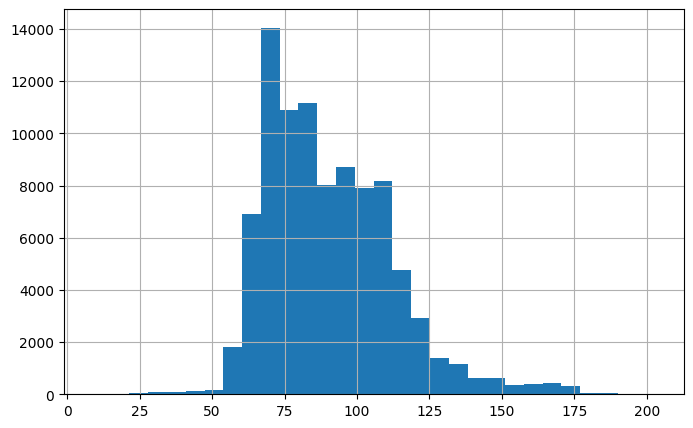

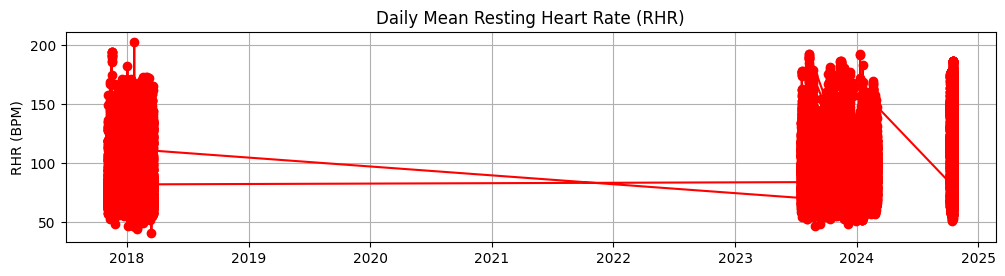

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
from IPython.display import display  # For better display in notebooks
import matplotlib.pyplot as plt

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')
    source = record.get('sourceName')

    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKWorkoutActivityType",
        "HKCategoryTypeIdentifierSleepAnalysis"
    ]:
        data.append([record_type, value, start_date, end_date, source])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date', 'end_date', 'source'])

# Convert date columns to datetime and value to numeric
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# EDA: Basic Statistics and Info

# 1. Dimensions of the DataFrame
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# 2. Column names and data types
print("\nColumns and Data Types:")
print(df.info())

# 3. Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Unique record types and counts
print("\nUnique Record Types and Their Counts:")
print(df['type'].value_counts())

# 6. Preview of the DataFrame
print("\nSample Data:")
display(df.sample(5))  # Random 5 rows

# 7. Distribution of values (histogram)
df['value'].hist(bins=30, figsize=(8, 5))


# Plotting the trends for mean Resting Heart Rate (RHR) and HRV SDNN over time
plt.figure(figsize=(12, 6))

# Filter for heart rate data
heart_rate_data = df[df['type'] == 'HKQuantityTypeIdentifierHeartRate']

# Resting Heart Rate over time
plt.subplot(2, 1, 1)
# Plot 'value' instead of 'HKQuantityTypeIdentifierHeartRate'
plt.plot(heart_rate_data['start_date'], heart_rate_data['value'], marker='o', color='red', label='Mean RHR')
plt.title('Daily Mean Resting Heart Rate (RHR)')
plt.ylabel('RHR (BPM)')
plt.grid(True)

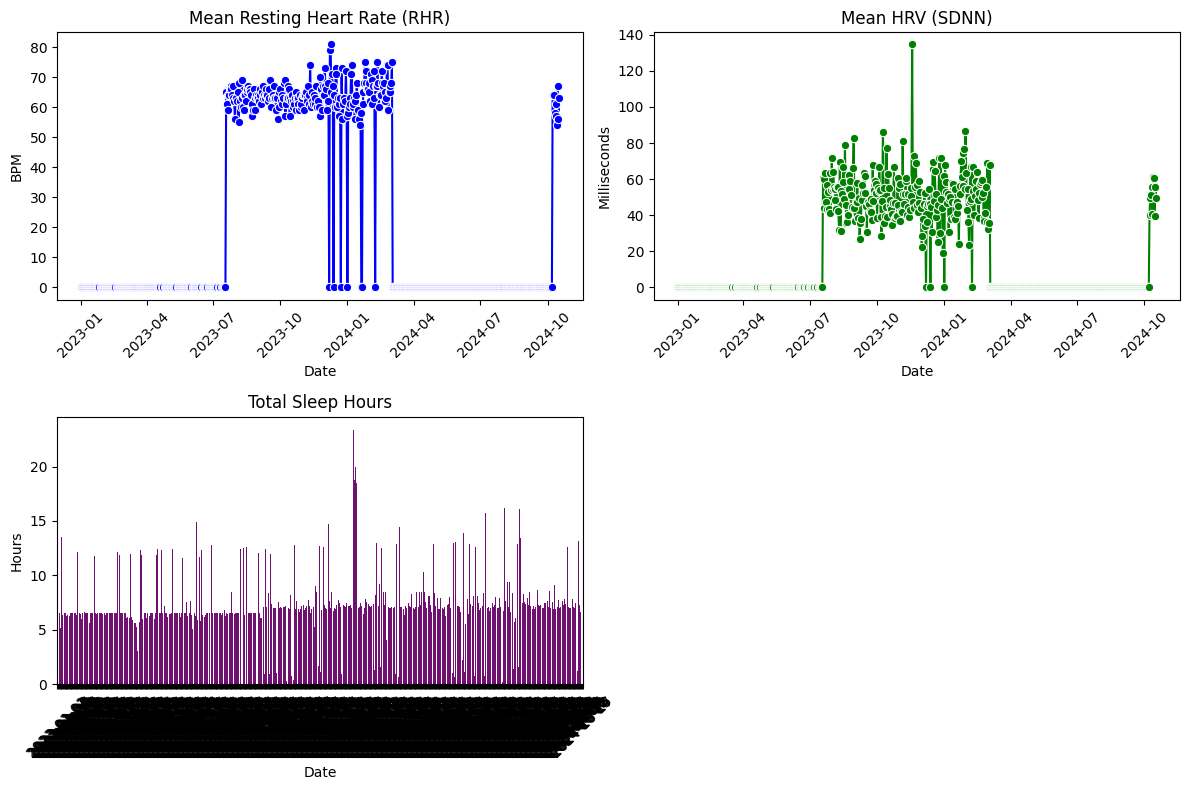

In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')

    # Filter for relevant records (RHR, HRV, Sleep, etc.)
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKCategoryTypeIdentifierSleepAnalysis",
        "HKWorkoutActivityType"
    ]:
        # If it's a sleep record, calculate the duration
        if record_type == "HKCategoryTypeIdentifierSleepAnalysis":
            start_datetime = pd.to_datetime(start_date)
            end_datetime = pd.to_datetime(end_date)
            sleep_duration = (end_datetime - start_datetime).total_seconds() / 3600  # Convert to hours
            data.append([record_type, sleep_duration, start_date])
        else:
            # For other types, append their values directly
            data.append([record_type, value, start_date])

# Create DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date'])

# Convert date columns and numeric values
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Aggregate daily metrics
daily_metrics = df.pivot_table(
    index='start_date',
    columns='type',
    values='value',
    aggfunc=['mean', 'min', 'max', 'sum']
).reset_index()

# Flatten multi-level column names
daily_metrics.columns = ['_'.join(col).strip() if col[1] else col[0] for col in daily_metrics.columns.values]

# Rename columns for clarity
daily_metrics = daily_metrics.rename(columns={
    'mean_HKQuantityTypeIdentifierRestingHeartRate': 'mean_rhr',
    'min_HKQuantityTypeIdentifierRestingHeartRate': 'min_rhr',
    'max_HKQuantityTypeIdentifierRestingHeartRate': 'max_rhr',
    'mean_HKQuantityTypeIdentifierHeartRateVariabilitySDNN': 'mean_hrv_sdnn',
    'sum_HKCategoryTypeIdentifierSleepAnalysis': 'total_sleep_hours',  # Sum of sleep hours
    'sum_HKWorkoutActivityType': 'total_workout_minutes'
})

# Fill missing values with 0 (or interpolate if appropriate)
daily_metrics = daily_metrics.fillna(0)

# Filter data to only include records from 2023 and 2024
daily_metrics['start_date'] = pd.to_datetime(daily_metrics['start_date'])
filtered_metrics = daily_metrics[
    (daily_metrics['start_date'].dt.year >= 2023) &
    (daily_metrics['start_date'].dt.year <= 2024)
]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot Resting Heart Rate (RHR)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_rhr', marker='o', color='b')
plt.title('Mean Resting Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

# Plot Heart Rate Variability (HRV)
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hrv_sdnn', marker='o', color='g')
plt.title('Mean HRV (SDNN)')
plt.xlabel('Date')
plt.ylabel('Milliseconds')
plt.xticks(rotation=45)

# Plot Total Sleep Hours
plt.subplot(2, 2, 3)
sns.barplot(data=filtered_metrics, x='start_date', y='total_sleep_hours', color='purple')
plt.title('Total Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


type  start_date  HKCategoryTypeIdentifierSleepAnalysis  \
0     2017-11-04                                    NaN   
1     2017-11-05                                    NaN   
2     2017-11-06                                    NaN   
3     2017-11-07                                    NaN   
4     2017-11-08                                    NaN   

type  HKQuantityTypeIdentifierHeartRate  \
0                             83.333333   
1                             86.336961   
2                             75.210526   
3                             81.201550   
4                             85.442710   

type  HKQuantityTypeIdentifierHeartRateVariabilitySDNN  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   

type  HKQuantityTypeIdentifierResting

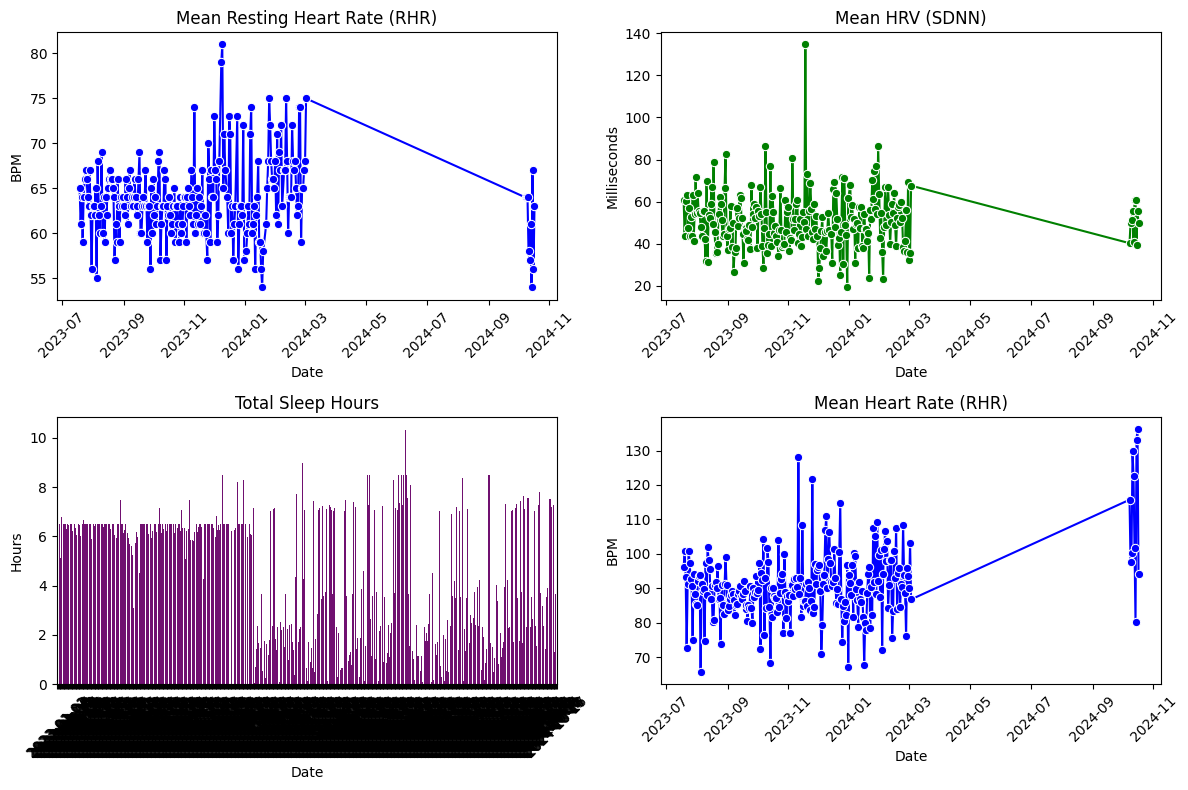

type,start_date,total_sleep_hours,mean_hr,mean_hrv_sdnn,mean_rhr
137,2020-09-23,8.004722,NaN,NaN,NaN
138,2020-09-24,8.006111,NaN,NaN,NaN
139,2020-09-26,7.808056,NaN,NaN,NaN
140,2020-09-27,8.005278,NaN,NaN,NaN
141,2020-09-28,8.005833,NaN,NaN,NaN


In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')

    # Filter for relevant records (RHR, HRV, Sleep, etc.)
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKCategoryTypeIdentifierSleepAnalysis",
    ]:
        if record_type == "HKCategoryTypeIdentifierSleepAnalysis":
            start_datetime = pd.to_datetime(start_date)
            end_datetime = pd.to_datetime(end_date)
            sleep_duration = (end_datetime - start_datetime).total_seconds() / 3600  # Convert to hours
            data.append([record_type, sleep_duration, start_date])
        else:
            data.append([record_type, value, start_date])

# Create DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date'])



# Convert date columns and numeric values
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['value'] = pd.to_numeric(df['value'], errors='coerce')


daily_metrics = df.groupby(['start_date', 'type'])['value'].mean().unstack().reset_index()

print(daily_metrics.head())

# Rename columns for clarity
daily_metrics = daily_metrics.rename(columns={
    'HKQuantityTypeIdentifierHeartRate': 'mean_hr',
    'HKQuantityTypeIdentifierRestingHeartRate': 'mean_rhr',
    'HKQuantityTypeIdentifierHeartRateVariabilitySDNN': 'mean_hrv_sdnn',
    'HKCategoryTypeIdentifierSleepAnalysis': 'total_sleep_hours'
})


# Fill missing values with 0, or drop rows with no data
daily_metrics = daily_metrics.dropna(how='all', subset=[
    'mean_rhr', 'mean_hrv_sdnn', 'total_sleep_hours'
])

# Filter 2023 and 2024 data only
daily_metrics['start_date'] = pd.to_datetime(daily_metrics['start_date'])
filtered_metrics = daily_metrics[
    (daily_metrics['start_date'].dt.year >= 2023) &
    (daily_metrics['start_date'].dt.year <= 2024)
]

# Plot the data (only where data exists)
plt.figure(figsize=(12, 8))


# Plot Resting Heart Rate (RHR)

# Plot Resting Heart Rate (RHR)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_rhr', marker='o', color='b')
plt.title('Mean Resting Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

# Plot Heart Rate Variability (HRV)
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hrv_sdnn', marker='o', color='g')
plt.title('Mean HRV (SDNN)')
plt.xlabel('Date')
plt.ylabel('Milliseconds')
plt.xticks(rotation=45)

# Plot Total Sleep Hours
plt.subplot(2, 2, 3)
sns.barplot(data=filtered_metrics, x='start_date', y='total_sleep_hours', color='purple')
plt.title('Total Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hr', marker='o', color='b')
plt.title('Mean Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


daily_metrics.head()

In [6]:
columns_to_impute = ['mean_rhr','mean_hr','mean_hrv_sdnn', 'total_sleep_hours']


for col in columns_to_impute:
    non_zero_mean = daily_metrics[daily_metrics[col] != 0][col].mean()
    daily_metrics[col] = daily_metrics[col].replace(0, non_zero_mean)

print(daily_metrics.head())

type start_date  total_sleep_hours  mean_hr  mean_hrv_sdnn  mean_rhr
137  2020-09-23           8.004722      NaN            NaN       NaN
138  2020-09-24           8.006111      NaN            NaN       NaN
139  2020-09-26           7.808056      NaN            NaN       NaN
140  2020-09-27           8.005278      NaN            NaN       NaN
141  2020-09-28           8.005833      NaN            NaN       NaN


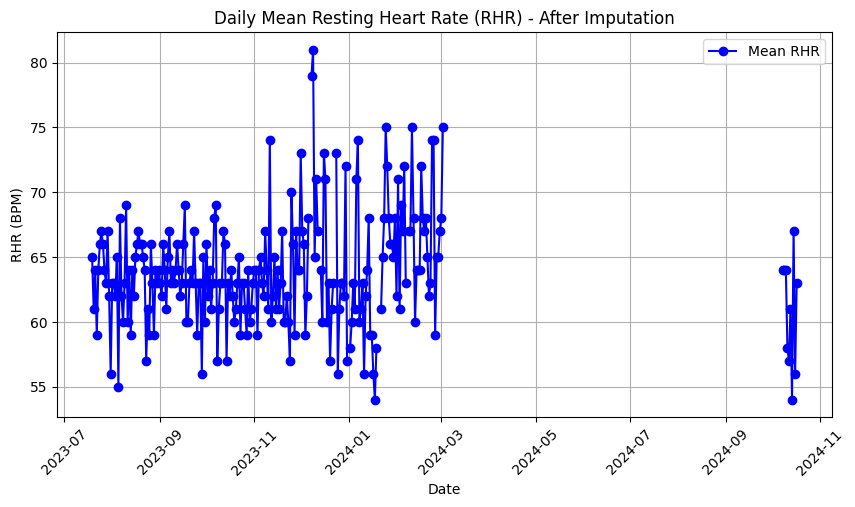

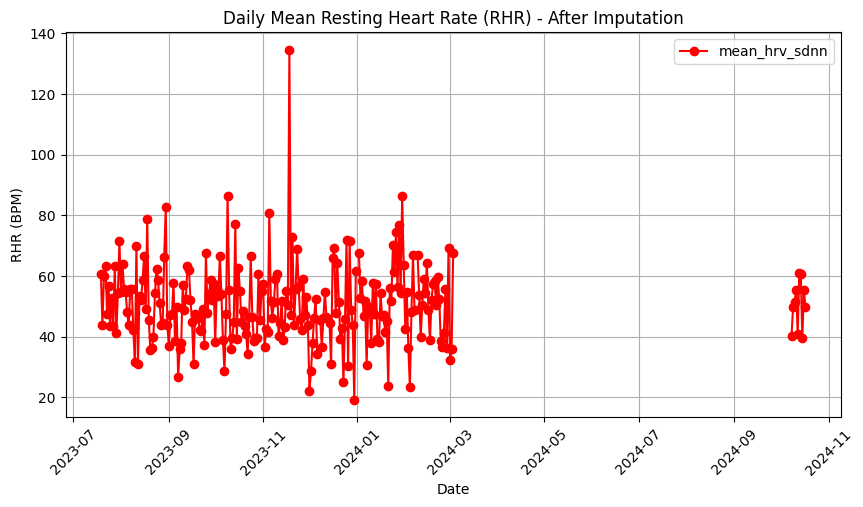

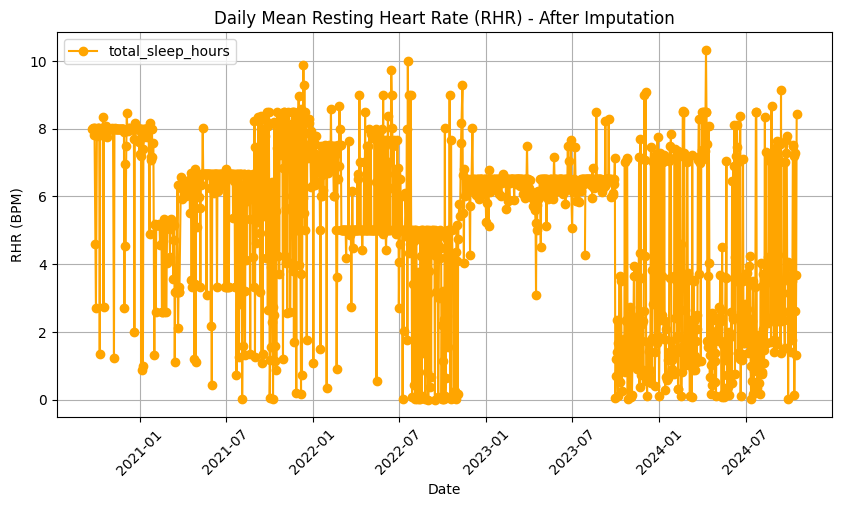

In [7]:
# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['mean_rhr'], marker='o', color='blue', label='Mean RHR')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['mean_hrv_sdnn'], marker='o', color='red', label='mean_hrv_sdnn')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['total_sleep_hours'], marker='o', color='orange', label='total_sleep_hours')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [8]:
def generate_synthetic_samples(data, size, stress_level, hr_factor, hrv_factor, sleep_factor, rhr_factor):
    samples = data.sample(size, random_state=42).copy()

    # Adjust the metrics to simulate stress conditions
    samples['mean_hr'] *= np.random.uniform(hr_factor[0], hr_factor[1], size=size)
    samples['mean_hrv_sdnn'] *= np.random.uniform(hrv_factor[0], hrv_factor[1], size=size)
    samples['total_sleep_hours'] *= np.random.uniform(sleep_factor[0], sleep_factor[1], size=size)
    samples['mean_rhr'] *= np.random.uniform(rhr_factor[0], rhr_factor[1], size=size)

    # Assign the synthetic stress level
    samples['stress_level'] = stress_level
    return samples

In [10]:
import numpy as np

low_stress_samples = generate_synthetic_samples(daily_metrics, size=1400, stress_level=0,
                                                hr_factor=(1.0, 1.1), hrv_factor=(0.8, 1.0),
                                                sleep_factor=(0.8, 1.0), rhr_factor=(1.0, 1.1))

medium_stress_samples = generate_synthetic_samples(daily_metrics, size=700, stress_level=1,
                                                   hr_factor=(1.1, 1.3), hrv_factor=(0.6, 0.8),
                                                   sleep_factor=(0.6, 0.8), rhr_factor=(1.1, 1.2))

high_stress_samples = generate_synthetic_samples(daily_metrics, size=700, stress_level=2,
                                                 hr_factor=(1.3, 1.5), hrv_factor=(0.4, 0.6),
                                                 sleep_factor=(0.4, 0.6), rhr_factor=(1.2, 1.3))

# Combine original data with synthetic samples
augmented_data = pd.concat([daily_metrics, low_stress_samples, medium_stress_samples, high_stress_samples], ignore_index=True)

In [11]:
def classify_stress_level(row):
    if row['mean_hr'] > 100 and row['mean_hrv_sdnn'] < 50 and row['total_sleep_hours'] < 5 and row['mean_rhr'] > 80:
        return 2  # High stress
    elif row['mean_hr'] > 75 and row['mean_hrv_sdnn'] < 60 and row['total_sleep_hours'] < 6 and row['mean_rhr'] > 70:
        return 1  # Medium stress
    else:
        return 0  # Low stress

In [12]:
augmented_data['stress_level'] = augmented_data.apply(classify_stress_level, axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib  # for saving the model
from imblearn.over_sampling import RandomOverSampler

# Step 1: Prepare the data
# Define features and labels
features = ['mean_hr', 'mean_hrv_sdnn', 'mean_rhr', 'total_sleep_hours']
X = augmented_data[features]
y = augmented_data['stress_level']

# Balance the dataset using oversampling if necessary
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- Step 6: Save the Model for Future Use ---

joblib.dump(model, 'stress_level_model.joblib')
print("Model saved as 'stress_level_model.joblib'")

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       808
      Medium       1.00      1.00      1.00       797
        High       1.00      1.00      1.00       798

    accuracy                           1.00      2403
   macro avg       1.00      1.00      1.00      2403
weighted avg       1.00      1.00      1.00      2403

Accuracy: 1.0
Model saved as 'stress_level_model.joblib'


In [22]:
import joblib

# Load the saved model
model = joblib.load('stress_level_model.joblib')
print("Model loaded successfully.")

import pandas as pd

# Sample new data for inference
new_data = pd.DataFrame({
    'mean_hr': [85, 110],           # Example heart rates
    'mean_hrv_sdnn': [40, 30],      # Example HRV values
    'mean_rhr': [75, 85],           # Example resting heart rates
    'total_sleep_hours': [6, 4.5]   # Example sleep hours
})

print("New data for inference:")
print(new_data)

predictions = model.predict(new_data)

# Map the predicted labels to their meanings
stress_levels = {0: 'Low', 1: 'Medium', 2: 'High'}
predicted_stress_levels = [stress_levels[pred] for pred in predictions]

# Display results
for i, pred in enumerate(predicted_stress_levels):
    print(f"Sample {i+1}: Predicted Stress Level - {pred}")



Model loaded successfully.
New data for inference:
   mean_hr  mean_hrv_sdnn  mean_rhr  total_sleep_hours
0       85             40        75                6.0
1      110             30        85                4.5
Sample 1: Predicted Stress Level - Medium
Sample 2: Predicted Stress Level - High


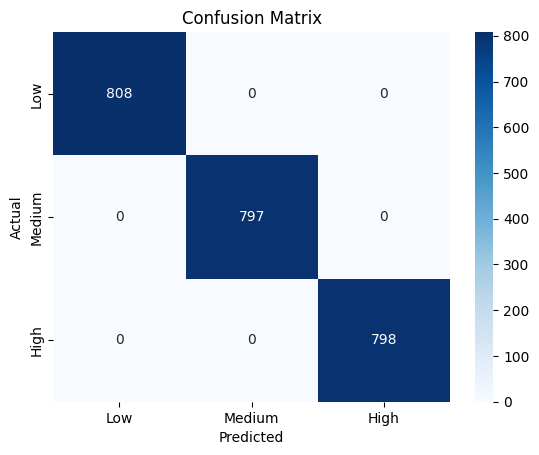

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

# One-hot encode the labels for multi-class ROC-AUC score calculation
y_test_encoded = pd.get_dummies(y_test, columns=['stress_level'])
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class="ovo")

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99291617 0.99881797 1.         0.99763593 0.99881797]
Mean CV Score: 0.9976376084693299


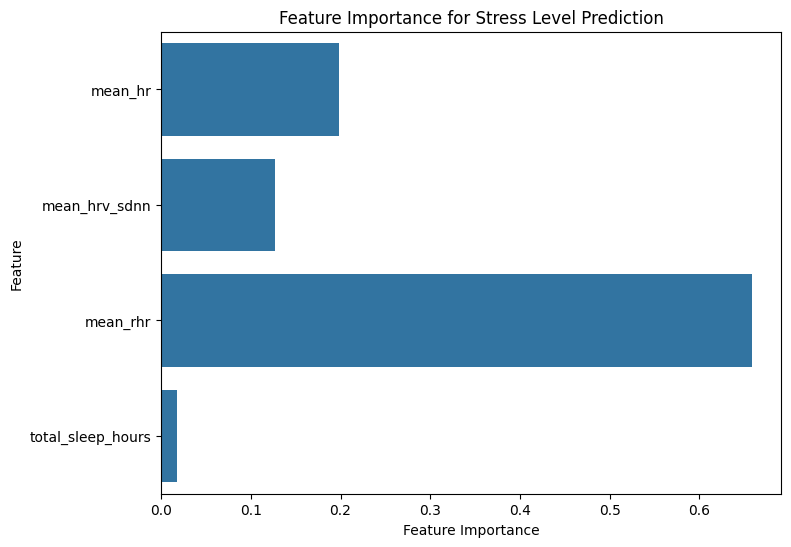

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Stress Level Prediction')
plt.show()

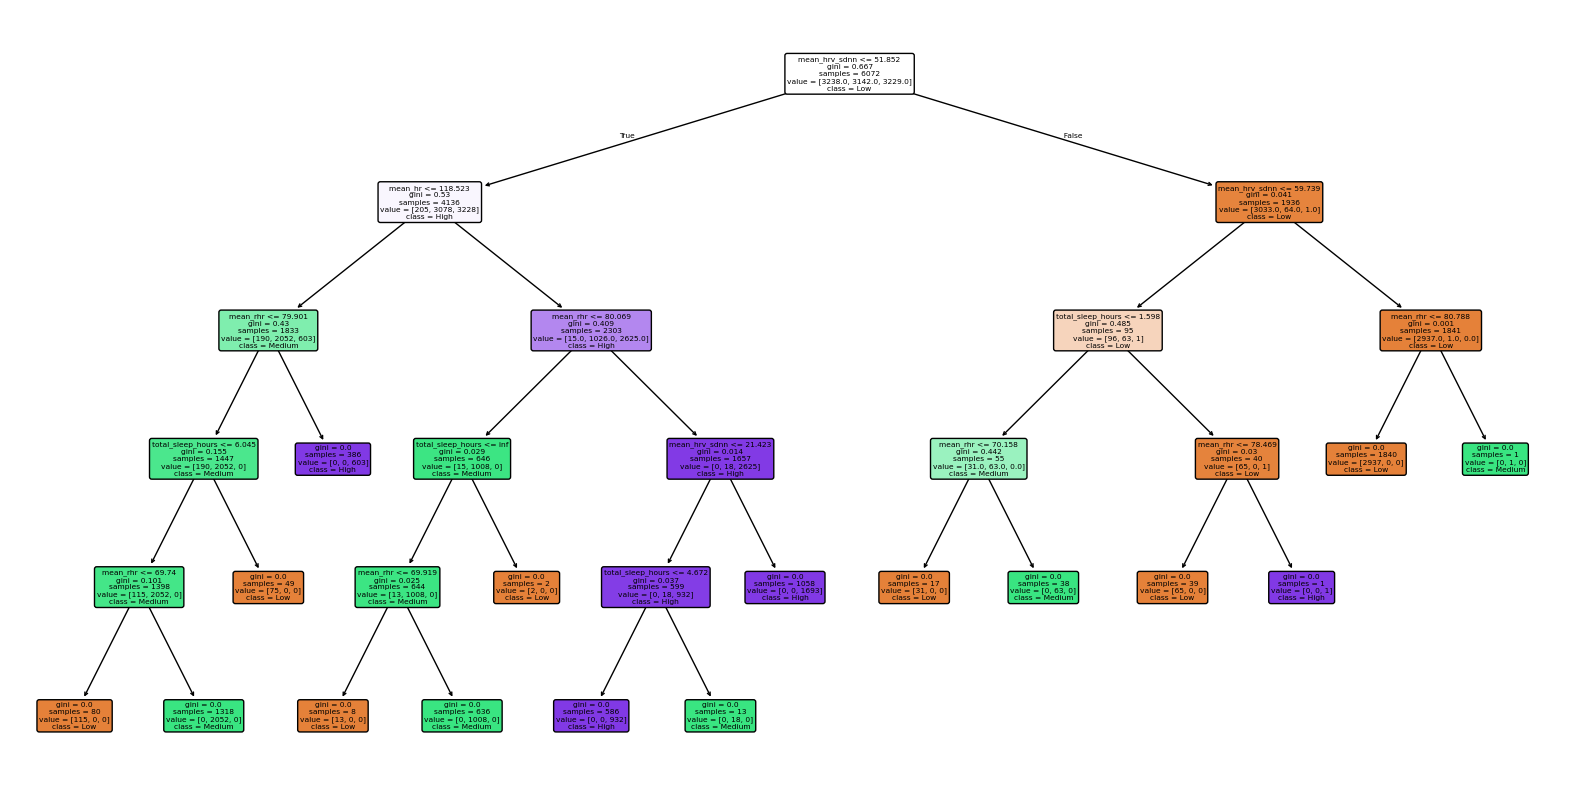

In [20]:
from sklearn.tree import plot_tree

# Plot one of the trees in the forest (e.g., the first tree)
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=features, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True)
plt.show()